# London Bike Rides

### 1. Installing packages 

In [27]:
#!pip install kaggle

import pandas as pd
import zipfile
import kaggle
import matplotlib.pyplot as plt

### 2. Importing the dataset 

In [28]:
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
License(s): other
london-bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [29]:
# extract the dataset from zip file
zipfile_name = 'london-bike-sharing-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [30]:
bikes = pd.read_csv("london_merged.csv")

### 3. EDA

In [31]:
bikes.shape

(17414, 10)

In [32]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [33]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [34]:
# Determine the number of distinct values in the weather_code column
bikes['weather_code'].value_counts()


1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [35]:
# Determine the number of distinct values in the season column
bikes['season'].value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

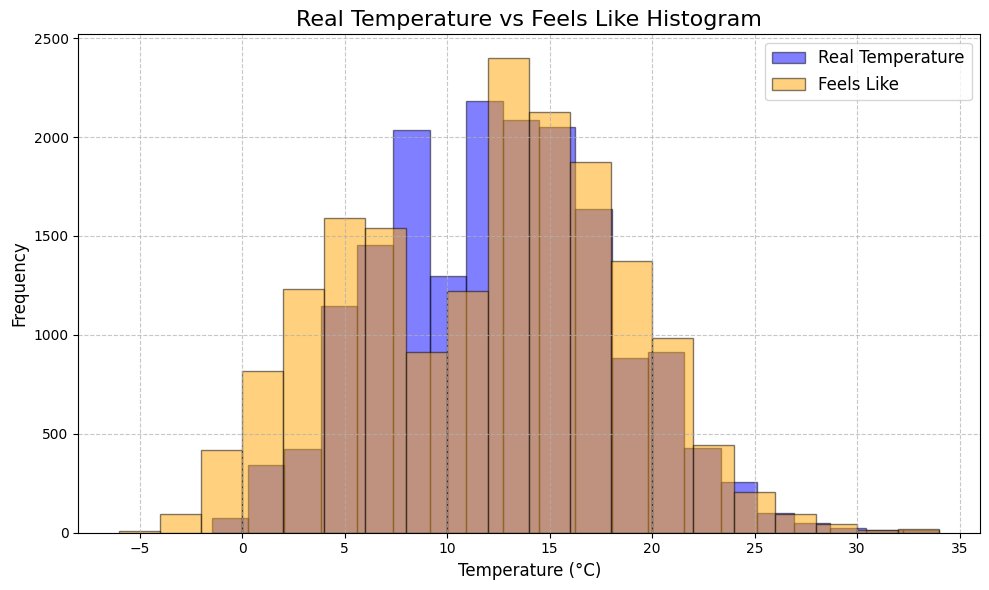

In [36]:
#Distribution of temperatures
plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.hist(bikes['t1'], bins=20, alpha=0.5, color='blue', label='Real Temperature', edgecolor='black')
plt.hist(bikes['t2'], bins=20, alpha=0.5, color='orange', label='Feels Like', edgecolor='black')

# Add title and labels
plt.title('Real Temperature vs Feels Like Histogram', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### 4. Transformation

In [37]:
# Converting the humidity values to percentages

bikes['hum'] = bikes['hum']/100

bikes['hum'].head()

0    0.930
1    0.930
2    0.965
3    1.000
4    0.930
Name: hum, dtype: float64

In [38]:
# Mapping integers 0-3 to season names with a dictionary
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'}

# Mapping integers to weather descriptions with a dictionary
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'}

# Converting the seasons column to strings and mapping integers 0-3 to season names
bikes['season'] = bikes['season'].astype('str')
bikes['season'] = bikes['season'].map(season_dict)

# Converting the weather column to strings and mapping values to weather descriptions
bikes['weather_code'] = bikes['weather_code'].astype('str')
bikes['weather_code'] = bikes['weather_code'].map(weather_dict)

In [39]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter


In [40]:
# Changing column names

cols_dict = {
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'}

bikes.rename(cols_dict, axis = 1, inplace = True)

In [41]:
bikes.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter


### 5. Exporting dataset to Excel

In [42]:
bikes.to_excel('london_bikes_dataset.xlsx', sheet_name = 'dataset')